In [1]:
from env import API_KEY
import pandas as pd,plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
import sweetviz as sv
import plotly.express as px


Obtaining Data

In [111]:
# Data Collection
from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=20*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('AAPL', frequency='daily',startDate=start_date_str, endDate=end_date_str)

df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2004-02-25 00:00:00+00:00,22.81,22.90,22.21,22.22,4933500,0.344807,0.346167,0.335737,0.335888,276276276,0.0,1.0
2004-02-26 00:00:00+00:00,23.04,23.18,22.80,22.84,3543000,0.348284,0.350400,0.344656,0.345260,198408198,0.0,1.0
2004-02-27 00:00:00+00:00,23.92,24.02,22.95,22.96,8372100,0.361586,0.363098,0.346923,0.347074,468838068,0.0,1.0
2004-03-01 00:00:00+00:00,24.02,24.30,23.87,24.09,5744300,0.363098,0.367330,0.360830,0.364156,321681121,0.0,1.0
2004-03-02 00:00:00+00:00,23.81,24.10,23.77,24.00,4583700,0.359923,0.364307,0.359319,0.362796,256687456,0.0,1.0


In [112]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'new_index'}, inplace=True)  # Rename the old index column
df['date'] = df['date'].dt.date  # Extract the date part from the datetime index
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2004-02-25,22.81,22.90,22.2100,22.22,4933500,0.344807,0.346167,0.335737,0.335888,276276276,0.0,1.0
1,2004-02-26,23.04,23.18,22.8000,22.84,3543000,0.348284,0.350400,0.344656,0.345260,198408198,0.0,1.0
2,2004-02-27,23.92,24.02,22.9500,22.96,8372100,0.361586,0.363098,0.346923,0.347074,468838068,0.0,1.0
3,2004-03-01,24.02,24.30,23.8700,24.09,5744300,0.363098,0.367330,0.360830,0.364156,321681121,0.0,1.0
4,2004-03-02,23.81,24.10,23.7700,24.00,4583700,0.359923,0.364307,0.359319,0.362796,256687456,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,2024-02-13,185.04,186.21,183.5128,185.77,56529529,185.040000,186.210000,183.512800,185.770000,56529529,0.0,1.0
5027,2024-02-14,184.15,185.53,182.4400,185.32,54630517,184.150000,185.530000,182.440000,185.320000,54630517,0.0,1.0
5028,2024-02-15,183.86,184.49,181.3500,183.55,65434496,183.860000,184.490000,181.350000,183.550000,65434496,0.0,1.0
5029,2024-02-16,182.31,184.85,181.6650,183.42,49752465,182.310000,184.850000,181.665000,183.420000,49752465,0.0,1.0


Exploratory Analysis

In [4]:
# Using Pandas sweetviz to generate a report on our dataframe
report = sv.analyze(df)
# report.show_notebook()
report.show_html('report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated.


Removing Columns

In [113]:
# Removing 'Dividends' and 'Stock Splits' columns
df = df.drop(['divCash', 'splitFactor','close','high','low'], axis = 1)
# See results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-02-25,22.22,4933500,0.344807,0.346167,0.335737,0.335888,276276276
1,2004-02-26,22.84,3543000,0.348284,0.350400,0.344656,0.345260,198408198
2,2004-02-27,22.96,8372100,0.361586,0.363098,0.346923,0.347074,468838068
3,2004-03-01,24.09,5744300,0.363098,0.367330,0.360830,0.364156,321681121
4,2004-03-02,24.00,4583700,0.359923,0.364307,0.359319,0.362796,256687456
...,...,...,...,...,...,...,...,...
5026,2024-02-13,185.77,56529529,185.040000,186.210000,183.512800,185.770000,56529529
5027,2024-02-14,185.32,54630517,184.150000,185.530000,182.440000,185.320000,54630517
5028,2024-02-15,183.55,65434496,183.860000,184.490000,181.350000,183.550000,65434496
5029,2024-02-16,183.42,49752465,182.310000,184.850000,181.665000,183.420000,49752465


Plotting a Candlestick Chart 

In [114]:
# # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
df_predict = df.tail(506)
# See results
df_predict

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
4525,2022-02-14,167.37,86185530,166.977475,167.669589,164.683611,165.484486,86185530
4526,2022-02-15,170.97,64286320,170.843426,171.001624,168.332041,169.043930,64286320
4527,2022-02-16,171.85,61177398,170.606130,171.387230,168.134294,169.914016,61177398
4528,2022-02-17,171.03,69589344,166.977475,169.973340,166.572093,169.103254,69589344
4529,2022-02-18,169.82,82772674,165.415274,168.620059,164.317779,167.906885,82772674
...,...,...,...,...,...,...,...,...
5026,2024-02-13,185.77,56529529,185.040000,186.210000,183.512800,185.770000,56529529
5027,2024-02-14,185.32,54630517,184.150000,185.530000,182.440000,185.320000,54630517
5028,2024-02-15,183.55,65434496,183.860000,184.490000,181.350000,183.550000,65434496
5029,2024-02-16,183.42,49752465,182.310000,184.850000,181.665000,183.420000,49752465


In [115]:
# # Removing last 2 years from the original dataframe
df.drop(df_predict.index,inplace = True)
# See results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-02-25,22.22,4933500,0.344807,0.346167,0.335737,0.335888,276276276
1,2004-02-26,22.84,3543000,0.348284,0.350400,0.344656,0.345260,198408198
2,2004-02-27,22.96,8372100,0.361586,0.363098,0.346923,0.347074,468838068
3,2004-03-01,24.09,5744300,0.363098,0.367330,0.360830,0.364156,321681121
4,2004-03-02,24.00,4583700,0.359923,0.364307,0.359319,0.362796,256687456
...,...,...,...,...,...,...,...,...
4520,2022-02-07,172.86,77251204,169.726156,171.986206,169.024155,170.912638,77251204
4521,2022-02-08,171.73,74829217,172.860445,173.374587,169.498747,169.795368,74829217
4522,2022-02-09,176.05,71285038,174.294110,174.659941,172.929656,174.066701,71285038
4523,2022-02-10,174.14,90865899,170.180974,173.503122,169.617396,172.178218,90865899


In [116]:
# Removing NaN
df.dropna(inplace=True)
# See Results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-02-25,22.22,4933500,0.344807,0.346167,0.335737,0.335888,276276276
1,2004-02-26,22.84,3543000,0.348284,0.350400,0.344656,0.345260,198408198
2,2004-02-27,22.96,8372100,0.361586,0.363098,0.346923,0.347074,468838068
3,2004-03-01,24.09,5744300,0.363098,0.367330,0.360830,0.364156,321681121
4,2004-03-02,24.00,4583700,0.359923,0.364307,0.359319,0.362796,256687456
...,...,...,...,...,...,...,...,...
4520,2022-02-07,172.86,77251204,169.726156,171.986206,169.024155,170.912638,77251204
4521,2022-02-08,171.73,74829217,172.860445,173.374587,169.498747,169.795368,74829217
4522,2022-02-09,176.05,71285038,174.294110,174.659941,172.929656,174.066701,71285038
4523,2022-02-10,174.14,90865899,170.180974,173.503122,169.617396,172.178218,90865899


<AxesSubplot: >

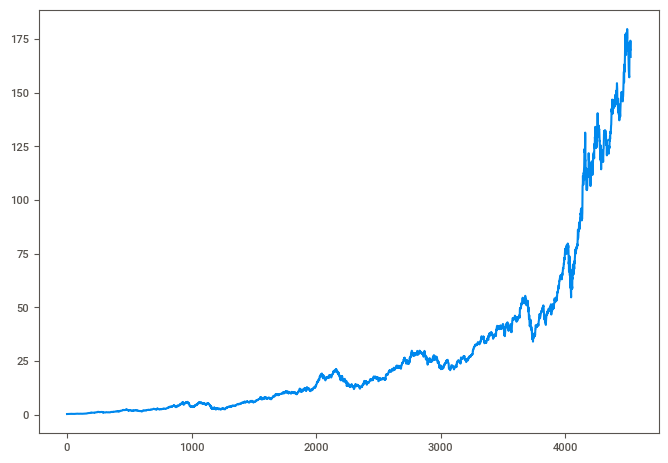

In [117]:
df.adjClose.plot()

In [118]:
diffs= df.diff()

<AxesSubplot: >

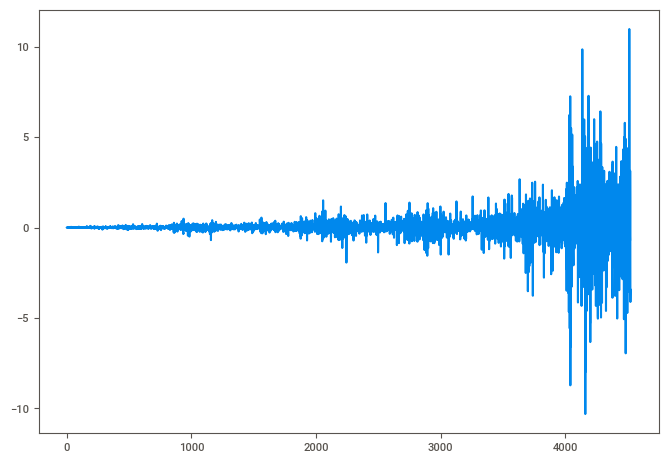

In [119]:
diffs.adjClose.plot()

In [64]:
# Using Pandas sweetviz to generate a report on our dataframe
report = sv.analyze(diffs)
# report.show_notebook()
# report.show_html('report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

In [120]:
diffs.corr()

,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
open,1.000000,-0.145266,0.052807,0.134472,0.164230,0.217978,-0.016414
volume,-0.145266,1.000000,-0.072535,0.115780,-0.224642,-0.002765,0.587236
adjClose,0.052807,-0.072535,1.000000,0.695312,0.673130,0.369129,-0.021415
adjHigh,0.134472,0.115780,0.695312,1.000000,0.755367,0.775701,0.022570
adjLow,0.164230,-0.224642,0.673130,0.755367,1.000000,0.733298,-0.062411
adjOpen,0.217978,-0.002765,0.369129,0.775701,0.733298,1.000000,-0.007708
adjVolume,-0.016414,0.587236,-0.021415,0.022570,-0.062411,-0.007708,1.000000


In [121]:
# Assuming your data is sorted by time
# Create a lag feature to represent the previous values
for i in range(1, 16):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'lag_{i}'] = diffs['adjClose'].shift(i)


In [122]:
diffs.head(10)

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1 day, 0:00:00",0.62,-1390500.0,0.003477,0.004233,0.008919,0.009372,-7.786808e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1 day, 0:00:00",0.12,4829100.0,0.013303,0.012698,0.002267,0.001814,2.704299e+08,0.003477,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"3 days, 0:00:00",1.13,-2627800.0,0.001512,0.004233,0.013907,0.017082,-1.471569e+08,0.013303,0.003477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1 day, 0:00:00",-0.09,-1160600.0,-0.003174,-0.003023,-0.001512,-0.001360,-6.499366e+07,0.001512,0.013303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"1 day, 0:00:00",-0.40,-563500.0,0.001663,0.001360,-0.002570,-0.006047,-3.155603e+07,-0.003174,0.001512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1 day, 0:00:00",0.36,7769500.0,0.018744,0.015570,0.004686,0.005442,4.350924e+08,0.001663,-0.003174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"1 day, 0:00:00",0.99,15721000.0,0.023884,0.034314,0.014965,0.014965,8.803769e+08,0.018744,0.001663,...,0.003477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"3 days, 0:00:00",1.84,-18173700.0,-0.011186,-0.010582,0.013605,0.027814,-1.017728e+09,0.023884,0.018744,...,0.013303,0.003477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"1 day, 0:00:00",-0.89,1705200.0,0.016628,0.006651,-0.000756,-0.013454,9.549130e+07,-0.011186,0.023884,...,0.001512,0.013303,0.003477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
diffs['date'] = df['date']
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
0,2004-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-02-26,0.62,-1390500.0,0.003477,0.004233,0.008919,0.009372,-77868078.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-02-27,0.12,4829100.0,0.013303,0.012698,0.002267,0.001814,270429870.0,0.003477,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-03-01,1.13,-2627800.0,0.001512,0.004233,0.013907,0.017082,-147156947.0,0.013303,0.003477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-03-02,-0.09,-1160600.0,-0.003174,-0.003023,-0.001512,-0.001360,-64993665.0,0.001512,0.013303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,2022-02-07,1.18,-5214196.0,-0.721776,-0.152463,0.266958,1.166707,-5214196.0,-0.286368,-2.903174,...,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041,0.868977
4521,2022-02-08,-1.13,-2421987.0,3.134288,1.388381,0.474593,-1.117270,-2421987.0,-0.721776,-0.286368,...,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041
4522,2022-02-09,4.32,-3544179.0,1.433665,1.285355,3.430909,4.271333,-3544179.0,3.134288,-0.721776,...,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283
4523,2022-02-10,-1.91,19580861.0,-4.113135,-1.156819,-3.312260,-1.888483,19580861.0,1.433665,3.134288,...,1.214593,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456


In [124]:
diffs = diffs.drop(0)
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
1,2004-02-26,0.62,-1390500.0,0.003477,0.004233,0.008919,0.009372,-77868078.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-02-27,0.12,4829100.0,0.013303,0.012698,0.002267,0.001814,270429870.0,0.003477,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-03-01,1.13,-2627800.0,0.001512,0.004233,0.013907,0.017082,-147156947.0,0.013303,0.003477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-03-02,-0.09,-1160600.0,-0.003174,-0.003023,-0.001512,-0.001360,-64993665.0,0.001512,0.013303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2004-03-03,-0.40,-563500.0,0.001663,0.001360,-0.002570,-0.006047,-31556031.0,-0.003174,0.001512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,2022-02-07,1.18,-5214196.0,-0.721776,-0.152463,0.266958,1.166707,-5214196.0,-0.286368,-2.903174,...,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041,0.868977
4521,2022-02-08,-1.13,-2421987.0,3.134288,1.388381,0.474593,-1.117270,-2421987.0,-0.721776,-0.286368,...,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041
4522,2022-02-09,4.32,-3544179.0,1.433665,1.285355,3.430909,4.271333,-3544179.0,3.134288,-0.721776,...,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283
4523,2022-02-10,-1.91,19580861.0,-4.113135,-1.156819,-3.312260,-1.888483,19580861.0,1.433665,3.134288,...,1.214593,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456


In [126]:
diffs.dropna()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
16,2004-03-18,-0.02,-1613400.0,-0.007861,-0.004837,-0.002872,-0.000302,-90350490.0,0.005593,-0.009523,...,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512,0.013303,0.003477
17,2004-03-19,-0.24,1562400.0,0.002872,0.013303,-0.000756,-0.003628,87494487.0,-0.007861,0.005593,...,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512,0.013303
18,2004-03-22,-0.33,186700.0,0.000000,-0.011640,-0.004384,-0.004988,10455211.0,0.002872,-0.007861,...,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512
19,2004-03-23,0.55,-598500.0,-0.008616,-0.002570,-0.000453,0.008314,-33516034.0,0.000000,0.002872,...,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174
20,2004-03-24,-0.62,762500.0,0.003174,-0.003779,0.000756,-0.009372,42700043.0,-0.008616,0.000000,...,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,2022-02-07,1.18,-5214196.0,-0.721776,-0.152463,0.266958,1.166707,-5214196.0,-0.286368,-2.903174,...,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041,0.868977
4521,2022-02-08,-1.13,-2421987.0,3.134288,1.388381,0.474593,-1.117270,-2421987.0,-0.721776,-0.286368,...,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041
4522,2022-02-09,4.32,-3544179.0,1.433665,1.285355,3.430909,4.271333,-3544179.0,3.134288,-0.721776,...,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283
4523,2022-02-10,-1.91,19580861.0,-4.113135,-1.156819,-3.312260,-1.888483,19580861.0,1.433665,3.134288,...,1.214593,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456


In [132]:
import numpy as np
np.where(diffs.adjClose >=0 ,1,0 )

array([1, 1, 1, ..., 1, 0, 0])

In [134]:
import numpy as np
diffs['target'] =np.where(diffs.adjClose >=0 ,1,0 )
diffs.head()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,...,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,target
1,2004-02-26,0.62,-1390500.0,0.003477,0.004233,0.008919,0.009372,-77868078.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2004-02-27,0.12,4829100.0,0.013303,0.012698,0.002267,0.001814,270429870.0,0.003477,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2004-03-01,1.13,-2627800.0,0.001512,0.004233,0.013907,0.017082,-147156947.0,0.013303,0.003477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2004-03-02,-0.09,-1160600.0,-0.003174,-0.003023,-0.001512,-0.001360,-64993665.0,0.001512,0.013303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2004-03-03,-0.40,-563500.0,0.001663,0.001360,-0.002570,-0.006047,-31556031.0,-0.003174,0.001512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [136]:
diffs.columns

Index(['date', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen',
       'adjVolume', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13',
       'lag_14', 'lag_15', 'target'],
      dtype='object')

In [137]:
diffs.drop(['date', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow','adjVolume'],axis=1,inplace=True)
diffs.head()


,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,target
1,0.009372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.001814,0.003477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.017082,0.013303,0.003477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,-0.001360,0.001512,0.013303,0.003477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,-0.006047,-0.003174,0.001512,0.013303,0.003477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [139]:
diffs.dropna(inplace=True)

In [140]:
diffs.head()

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,target
16,-0.000302,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512,0.013303,0.003477,0
17,-0.003628,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512,0.013303,1
18,-0.004988,0.002872,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512,1
19,0.008314,0.000000,0.002872,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0
20,-0.009372,-0.008616,0.000000,0.002872,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,1


In [144]:
diffs.iloc[:,:-1]

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
16,-0.000302,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512,0.013303,0.003477
17,-0.003628,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512,0.013303
18,-0.004988,0.002872,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174,0.001512
19,0.008314,0.000000,0.002872,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663,-0.003174
20,-0.009372,-0.008616,0.000000,0.002872,-0.007861,0.005593,-0.009523,-0.016779,0.006198,-0.008012,0.008768,0.016628,-0.011186,0.023884,0.018744,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,1.166707,-0.286368,-2.903174,1.214593,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041,0.868977
4521,-1.117270,-0.721776,-0.286368,-2.903174,1.214593,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283,-3.229041
4522,4.271333,3.134288,-0.721776,-0.286368,-2.903174,1.214593,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456,-3.525283
4523,-1.888483,1.433665,3.134288,-0.721776,-0.286368,-2.903174,1.214593,-0.167871,4.394260,10.970839,-0.464113,-0.088873,-1.816953,-0.780105,-2.073696,-1.698456


In [141]:
from pycaret.classification import *
s = setup(diffs ,target='target',session_id=123)

FloatingPointError: underflow encountered in cast